## Cyber Security
### Problem Statement:

#### Book-My-Show will enable the ads on their website, but they are also very cautious about their user privacy and information who visit their website. Some ads URL could contain a malicious link that can trick any recipient and lead to a malware installation, freezing the system as part of a ransomware attack or revealing sensitive information. Book-My-Show now wants to analyze that whether the particular URL is prone to phishing (malicious) or not.


### Dataset Details: 

#### The input dataset contains an 11k sample corresponding to the 11k URL. Each sample contains 32 features that give a different and unique description of URL ranging from -1,0,1.
#### -1: Phishing
#### 0: Suspicious
#### 1: Legitimate

#### The sample could be either legitimate or phishing.

### Project Task: Week 1

### Exploratory Data Analysis:
#### 1. Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 
#### 2. Determine the number of samples present in the data, unique elements in all the features. 
#### 3. Check if there is any null value in any features. 

###  Correlation of features and feature selection:
#### 4. Next, we have to find if there are any correlated features present in the data. Remove the feature which might be correlated with some threshold.

### Project Task: Week 2
### Building Classification Model
#### 1. Finally, build a robust classification system that classifies whether the URL sample is a phishing site or not.
####  - Build classification models using a binary classifier to detect malicious or phishing URLs.
####  - Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.
####  - Validate the accuracy of data by the K-Fold cross-validation technique.
####  - The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Week1: 1. Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps.

In [2]:
# Read the data file and print the header row. 
df_cs = pd.read_csv('dataset.csv')
df_cs.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


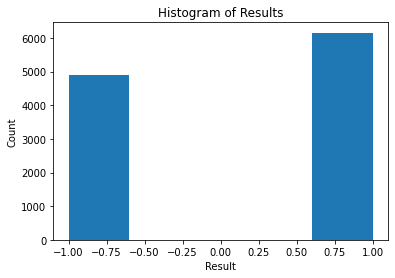

In [3]:
## Histogram - Equal size bins, equal intervals
plt.hist(df_cs['Result'], bins=5)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Histogram of Results')
plt.show()

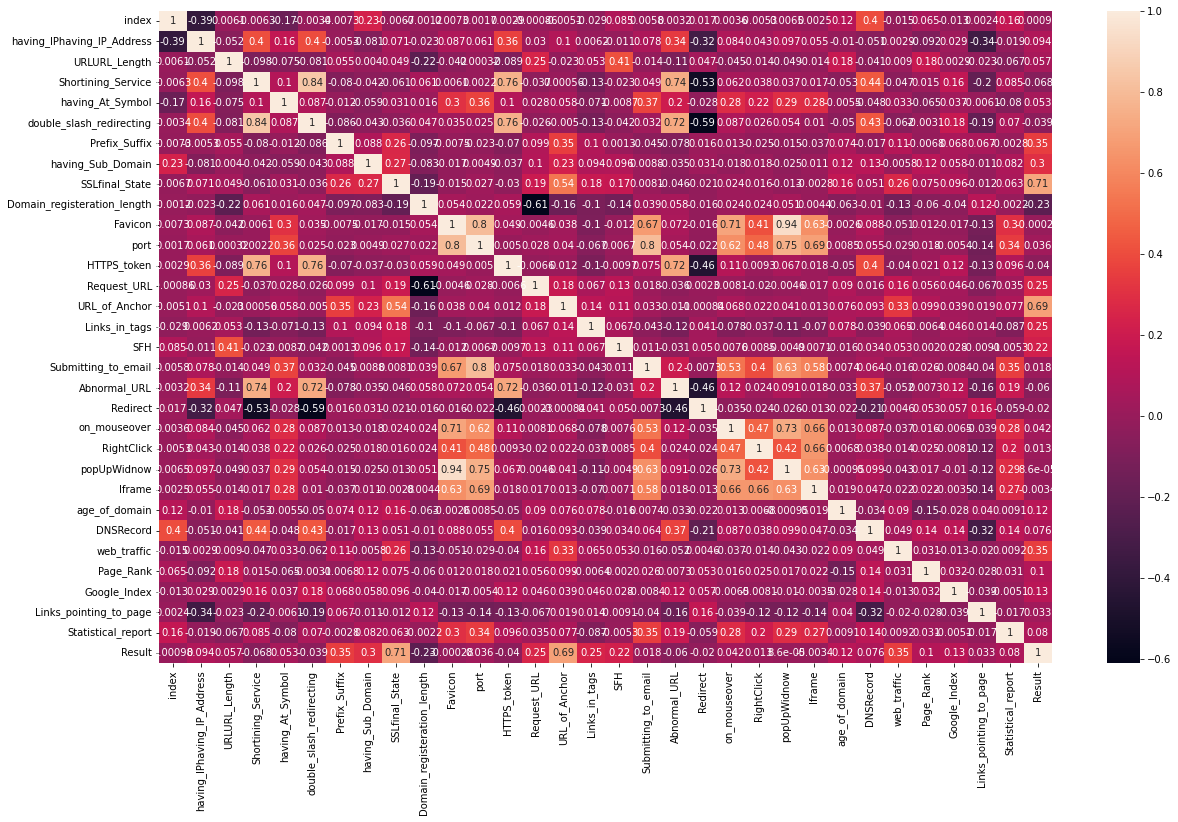

In [4]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cs.corr(), annot=True)
plt.show()

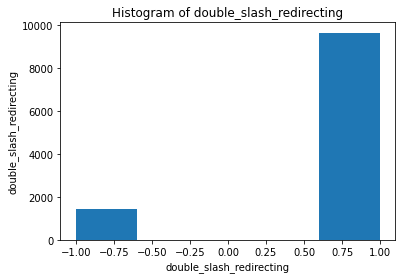

In [5]:
## Histogram - Equal size bins, equal intervals
plt.hist(df_cs['double_slash_redirecting'], bins=5)
plt.xlabel('double_slash_redirecting')
plt.ylabel('double_slash_redirecting')
plt.title('Histogram of double_slash_redirecting')
plt.show()

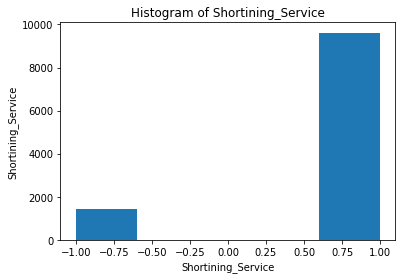

In [6]:
## Histogram - Equal size bins, equal intervals
plt.hist(df_cs['Shortining_Service'], bins=5)
plt.xlabel('Shortining_Service')
plt.ylabel('Shortining_Service')
plt.title('Histogram of Shortining_Service')
plt.show()

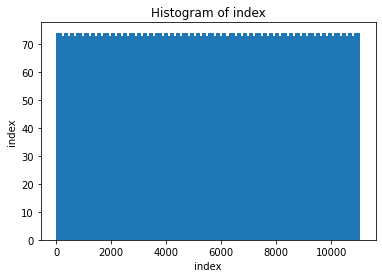

In [7]:
## Histogram - Equal size bins, equal intervals
plt.hist(df_cs['index'], bins=150)
plt.xlabel('index')
plt.ylabel('index')
plt.title('Histogram of index')
plt.show()

### Week1: 2 Determine the number of samples present in the data, unique elements in all the features.

In [8]:
# Print unique values in data frame
for col in df_cs:
    print(f'{col}; \t Total number of values are: {df_cs[col].value_counts()};  \n Unique Values are: {df_cs[col].unique()}')
    

index; 	 Total number of values are: 2047     1
7449     1
9510     1
3363     1
1314     1
        ..
613      1
2660     1
8801     1
10848    1
2049     1
Name: index, Length: 11055, dtype: int64;  
 Unique Values are: [    1     2     3 ... 11053 11054 11055]
having_IPhaving_IP_Address; 	 Total number of values are:  1    7262
-1    3793
Name: having_IPhaving_IP_Address, dtype: int64;  
 Unique Values are: [-1  1]
URLURL_Length; 	 Total number of values are: -1    8960
 1    1960
 0     135
Name: URLURL_Length, dtype: int64;  
 Unique Values are: [ 1  0 -1]
Shortining_Service; 	 Total number of values are:  1    9611
-1    1444
Name: Shortining_Service, dtype: int64;  
 Unique Values are: [ 1 -1]
having_At_Symbol; 	 Total number of values are:  1    9400
-1    1655
Name: having_At_Symbol, dtype: int64;  
 Unique Values are: [ 1 -1]
double_slash_redirecting; 	 Total number of values are:  1    9626
-1    1429
Name: double_slash_redirecting, dtype: int64;  
 Unique Values are: [-1  1

## Week1: 3. Check if there is any null value in any features.

In [9]:
# Print the column information which shows that all data fields contain the non-null value and are of integer data type.  No categorical data present in the dataset. 
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [10]:
df = df_cs
df.drop('index', axis=1, inplace=True)

In [11]:
df_cs.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [12]:
# Find unique data sets.  The result shows that there are 5,849 unique rows whereas 5206 rows are duplicates
df.duplicated().value_counts()

False    5849
True     5206
dtype: int64

In [13]:
# Remove the duplicates by keeping the first duplicate record
df.drop_duplicates(keep='first', inplace=True)

In [14]:
# Check again if the duplicate records are gone. 
df.duplicated().value_counts()

False    5849
dtype: int64

## 3. Check if there is any null value in any features.

In [15]:
# The following statement will list the count of null values by datafield names.  The result shows that there is no null value. 
df.isna().sum()

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [16]:
df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


## 4. Next, we have to find if there are any correlated features present in the data. Remove the feature which might not be correlated with some threshold

In [17]:
# Find out which features have correlation with the Result datafield.  
df_corr = df.corr()
df_corr = df_corr[(df_corr.abs() > 0.1) & (df_corr.abs() <= 1)]
df_corr['Result']
# The output shows that only 12 data fields have some correlation while others have no correlation or negligible relation. 

having_IPhaving_IP_Address     0.104952
URLURL_Length                       NaN
Shortining_Service                  NaN
having_At_Symbol                    NaN
double_slash_redirecting            NaN
Prefix_Suffix                  0.381134
having_Sub_Domain              0.296214
SSLfinal_State                 0.693228
Domain_registeration_length   -0.218623
Favicon                             NaN
port                                NaN
HTTPS_token                         NaN
Request_URL                    0.237778
URL_of_Anchor                  0.679125
Links_in_tags                  0.243864
SFH                            0.281131
Submitting_to_email                 NaN
Abnormal_URL                        NaN
Redirect                            NaN
on_mouseover                        NaN
RightClick                          NaN
popUpWidnow                         NaN
Iframe                              NaN
age_of_domain                       NaN
DNSRecord                           NaN


In [18]:
df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [19]:
# Remove the feature which might not be correlated with some threshold. 
df = df.iloc[:, [0,5,6,7,8,12,13,14,15,25,27,29,30]]
df.head()

,having_IPhaving_IP_Address,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Request_URL,URL_of_Anchor,Links_in_tags,SFH,web_traffic,Google_Index,Statistical_report,Result
0,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1
1,1,-1,0,1,-1,1,0,-1,-1,0,1,1,-1
2,1,-1,-1,-1,-1,1,0,-1,-1,1,1,-1,-1
3,1,-1,-1,-1,1,-1,0,0,-1,1,1,1,-1
4,1,-1,1,1,-1,1,0,0,-1,0,1,1,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 0 to 11054
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   5849 non-null   int64
 1   Prefix_Suffix                5849 non-null   int64
 2   having_Sub_Domain            5849 non-null   int64
 3   SSLfinal_State               5849 non-null   int64
 4   Domain_registeration_length  5849 non-null   int64
 5   Request_URL                  5849 non-null   int64
 6   URL_of_Anchor                5849 non-null   int64
 7   Links_in_tags                5849 non-null   int64
 8   SFH                          5849 non-null   int64
 9   web_traffic                  5849 non-null   int64
 10  Google_Index                 5849 non-null   int64
 11  Statistical_report           5849 non-null   int64
 12  Result                       5849 non-null   int64
dtypes: int64(13)
memory usage: 639.7 KB


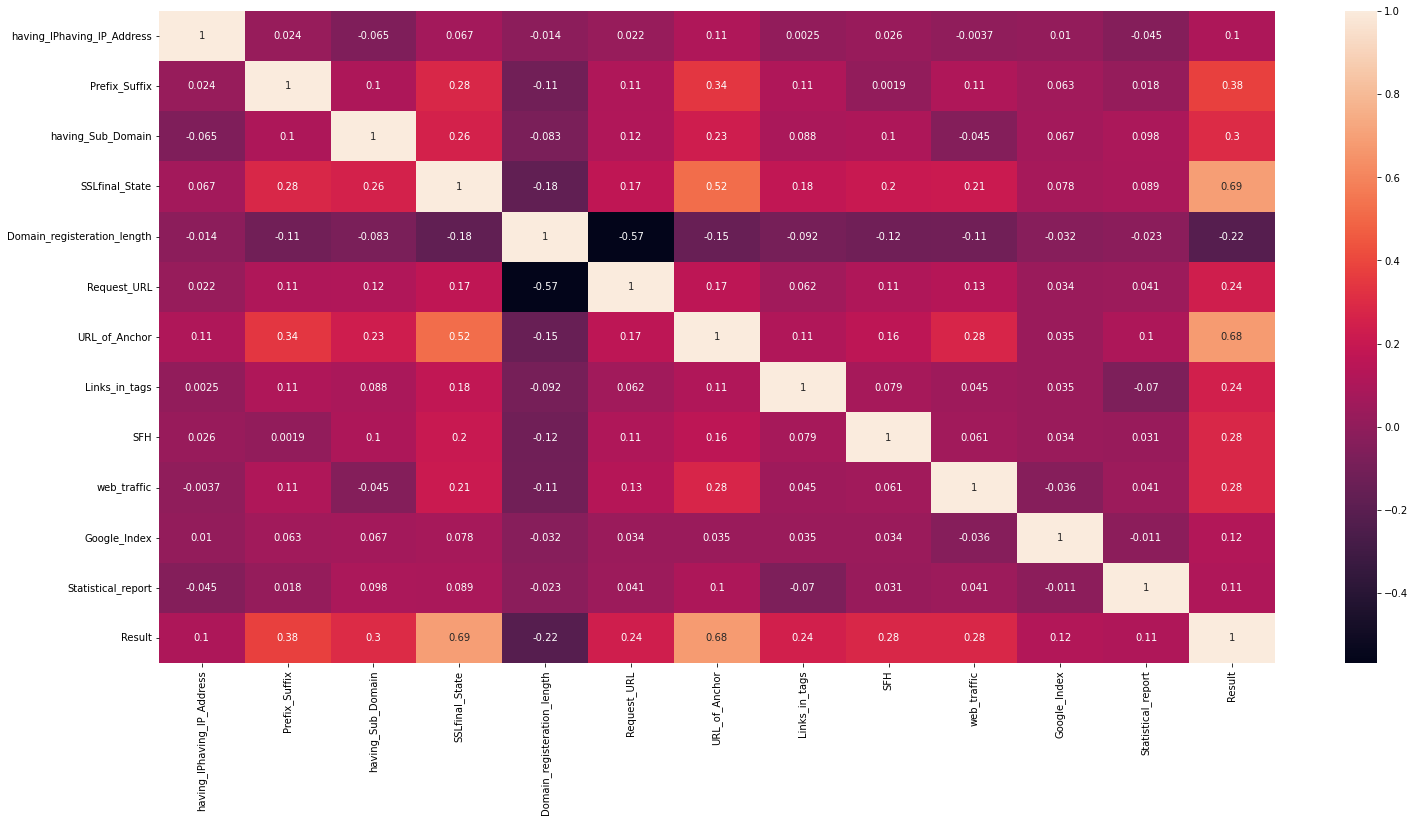

In [21]:
# Draw a heatmap showing data correlations
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Week2: Building Classification Model
## 1. Finally, build a robust classification system that classifies whether the URL sample is a phishing site or not.
## - Build classification models using a binary classifier to detect malicious or phishing URLs.
## - Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.
## - Validate the accuracy of data by the K-Fold cross-validation technique.
## - The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.

In [22]:
# Using LogisticRegression method here
from sklearn.model_selection import train_test_split
X = df.drop('Result', axis=1)
y= df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1234)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predicted=model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
print("Accuracy Score: ", accuracy_score(y_test, predicted))
print("Classification Report: \n", classification_report(y_test, predicted))
print("Confusion Matrix: \n", confusion_matrix(y_test, predicted))
print("R2 Score: ", r2_score(y_test, predicted))

Accuracy Score:  0.9123006833712984
Classification Report: 
               precision    recall  f1-score   support

          -1       0.91      0.91      0.91       442
           1       0.91      0.91      0.91       436

    accuracy                           0.91       878
   macro avg       0.91      0.91      0.91       878
weighted avg       0.91      0.91      0.91       878

Confusion Matrix: 
 [[403  39]
 [ 38 398]]
R2 Score:  0.6491863506164639


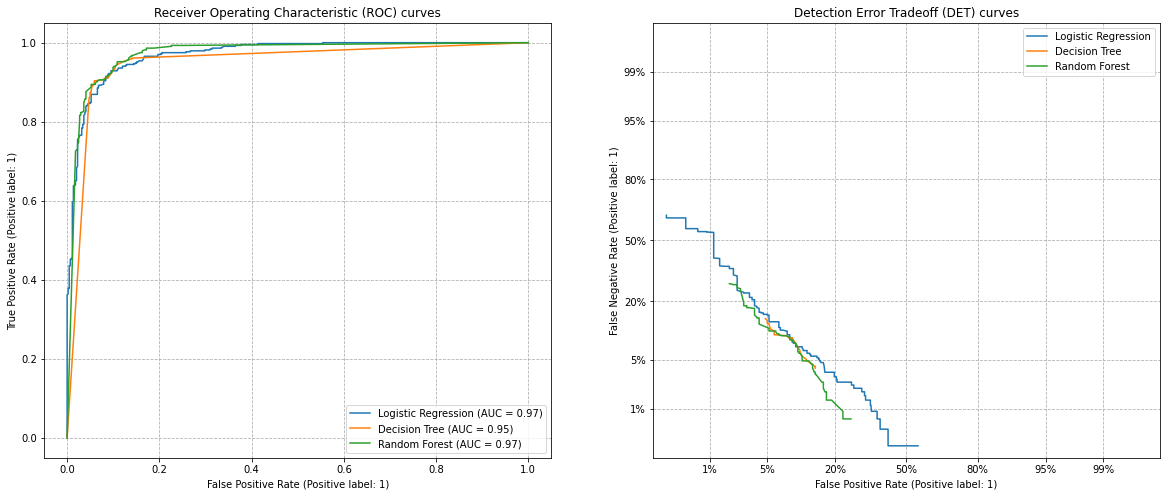

In [26]:
from sklearn.metrics import RocCurveDisplay, DetCurveDisplay
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

classifiers = { 
                "Logistic Regression": LogisticRegression(), 
                "Decision Tree": tree.DecisionTreeClassifier(),
                "Random Forest": RandomForestClassifier(n_estimators=10)
              }

fig, [ax_roc, ax_det]= plt.subplots(1,2, figsize=(20,8))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')

plt.legend()
plt.show()
    

### The End ### 
#### By Vinod Sinha, April 21, 2023